In [10]:
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
# 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import psycopg2
import plotly.graph_objects as go
import pandas as pd




#### create confusion openboundary lsa vs edgegrowth2



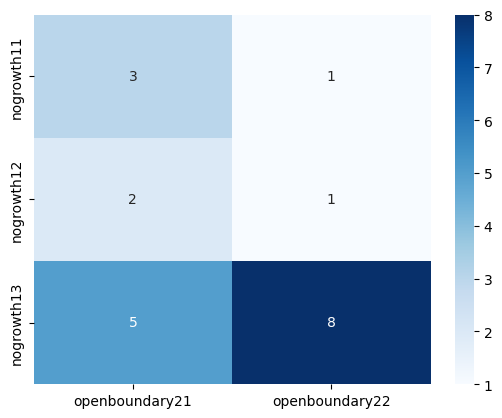

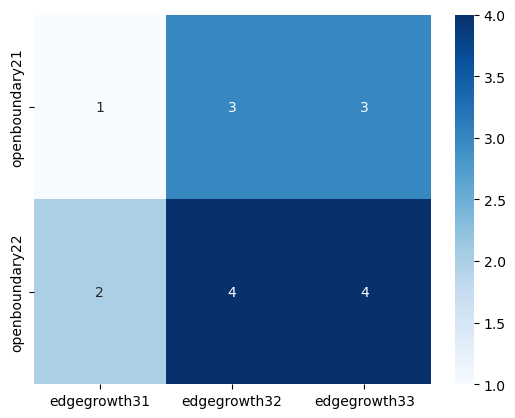

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns 

d1 = {'openboundary21': [3,2,5], 'openboundary22': [1,1,8]}
df1 = pd.DataFrame(data=d1, index=['nogrowth11','nogrowth12','nogrowth13'])

d2 = {'edgegrowth31': [1, 2], 'edgegrowth32': [3, 4],'edgegrowth33': [3, 4]  }
df2 = pd.DataFrame(data=d2, index=['openboundary21','openboundary22'])
sns.heatmap(df1, annot=True, cmap='Blues')
plt.show()

sns.heatmap(df2, annot=True, cmap='Blues')
plt.show()


In [26]:


labels =list( df1.index)
columns = list(df1.columns)
node_labels = labels + columns

color_list = ['blue', 'green', 'orange', 'purple', 'red','yellow','black','brown','pink']

input_colors={}
for l,c in zip(node_labels,color_list):
    input_colors[l]=c

# Prepare data for Plotly Sankey Diagram
link_source = []
link_target = []
link_value = []
link_color=[]

for i, row_label in enumerate(labels):
    # input_color = input_colors[row_label]
    # input_color='blue'

    for j, col_label in enumerate(columns):
        count = df1.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels) + j)
        link_value.append(count)
        # link_color.append(input_color)


# Create the Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        # color=link_color,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        # color=link_color
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


In [28]:


labels =list( df2.index)
columns = list(df2.columns)
node_labels = labels + columns

color_list = ['blue', 'green', 'orange', 'purple', 'red','yellow','black','brown','pink']

input_colors={}
for l,c in zip(node_labels,color_list):
    input_colors[l]=c

# Prepare data for Plotly Sankey Diagram
link_source = []
link_target = []
link_value = []
link_color=[]

for i, row_label in enumerate(labels):
    # input_color = input_colors[row_label]
    # input_color='blue'

    for j, col_label in enumerate(columns):
        count = df2.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels) + j)
        link_value.append(count)
        # link_color.append(input_color)


# Create the Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        # color=link_color,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        # color=link_color
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


In [36]:
columns2

['edgegrowth31', 'edgegrowth32', 'edgegrowth33']

In [38]:
import plotly.graph_objects as go

# Assuming you have data for two separate Sankey diagrams (patternclass_cf1 and patternclass_cf2)
# Merge the data from the two Sankey diagrams



labels1 = list(df1.index)
columns1 = list(df1.columns)

labels2 = list(df2.index)
columns2 = list(df2.columns)

# Adjust the order of labels and columns in labels2 and columns2
desired_order_labels2= ['openboundary21','openboundary22']  # Replace with your desired order
desired_order_columns2= ['edgegrowth31','edgegrowth32','edgegrowth33']  # Replace with your desired order

# Filter the labels and columns based on the desired order
labels2 = [label for label in desired_order_labels2 if label in labels2]
columns2 = [column for column in desired_order_columns2 if column in columns2]



# Prepare data for the merged Sankey diagram
link_source = []
link_target = []
link_value = []

for i, row_label in enumerate(labels1):
    for j, col_label in enumerate(columns1):
        count = df1.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels1) + j)
        link_value.append(count)

for i, row_label in enumerate(labels2):
    for j, col_label in enumerate(columns2):
        count = df2.loc[row_label, col_label]
        print(row_label, col_label, count)
        link_source.append(len(labels1) + i)
        link_target.append(2 * len(labels2) + len(columns2) + j)
        link_value.append(count)

# Create the merged Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="No growth vs. Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


openboundary21 edgegrowth31 1
openboundary21 edgegrowth32 3
openboundary21 edgegrowth33 3
openboundary22 edgegrowth31 2
openboundary22 edgegrowth32 4
openboundary22 edgegrowth33 4
